In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math

plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 

In [2]:
# scenarioname = "S1_S2"
# selected_scenarios = ["S1", "S2"]
scenarioname = "sequences4"
selected_scenarios = ["iteration1", "iteration2","iteration3","iteration4", "iteration5","iteration6","iteration7","iteration8","iteration9","iteration10"]
# selected_scenarios =["LowRES_(2010)","medianRES_(2004)","highRES_(1990)"] 



In [3]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)

In [4]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}

In [5]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)

LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)

SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
Monthly_ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='MonthlyElectricityPrices', index_col=0)

ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)
InstalledCapacity_data = pd.read_excel(path_to_results, sheet_name='InstalledCapacity', index_col=0)
Info_data = pd.read_excel(path_to_results, sheet_name='Info', index_col=0)

Invested_capacity_data = pd.read_excel(path_to_results, sheet_name='Invested', index_col=0)
Dismantled_capacity_data = pd.read_excel(path_to_results, sheet_name='Dismantled', index_col=0)
H2Production_data = pd.read_excel(path_to_results, sheet_name='H2Production', index_col=0)
AverageNPVpertechnology = pd.read_excel(path_to_results, sheet_name='AverageNPVpertechnology',  header=[0,1], index_col=0)
AverageProfits = pd.read_excel(path_to_results, sheet_name='Profits',  header=[0,1], index_col=0)

In [6]:
NPVNewPlants_data = pd.read_excel(path_to_results, sheet_name='overallNPV', index_col=0)
IRRNewPlants_data = pd.read_excel(path_to_results, sheet_name='overallIRR', index_col=0)

In [7]:
InstalledCapacity_data.drop([2046, 2047,2048,2049, 2050], inplace=True)

In [8]:
InstalledCapacity_data.drop([2090, 2091,2092,2093], inplace=True)

In [9]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
# ax1.plot(Coststosociety_data)
# #ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
# plt.ylim([50, 80])
# ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
# ax2.plot(Coststosociety_data)
# #ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.xlabel('Years', fontsize='large')
# fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

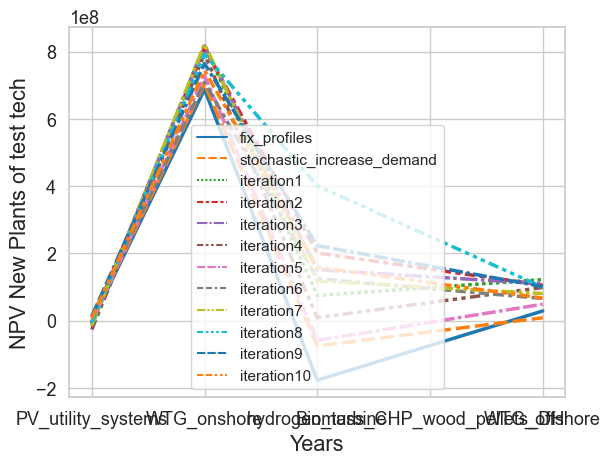

In [10]:
axs1 = sns.lineplot(data=NPVNewPlants_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('NPV New Plants of test tech', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('NPV new power plants')
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'NPVNewPlants.png', bbox_inches='tight', dpi=300)

In [11]:
Dismantled_capacity_data *= -1

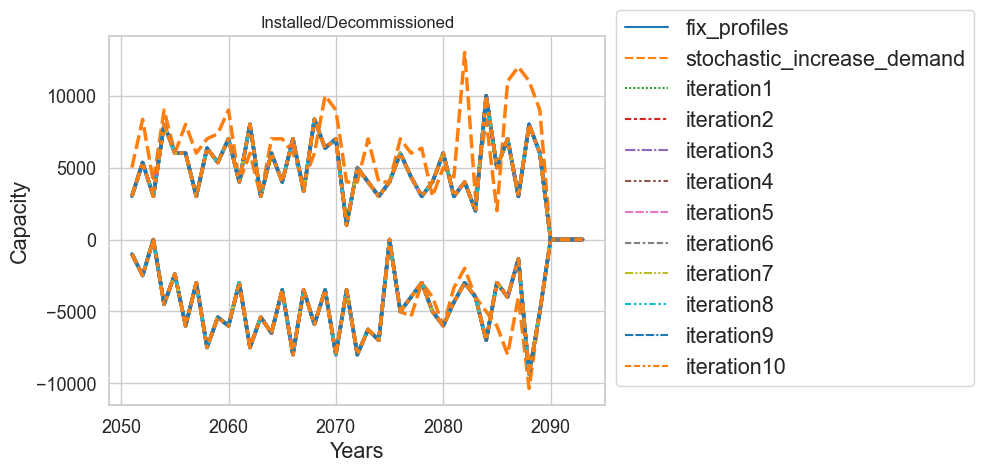

In [12]:
Dismantled_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
Invested_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
axs2 = sns.lineplot(data=Dismantled_capacity_data, palette="tab10", linewidth=2.5)
axs2 = sns.lineplot(data=Invested_capacity_data, palette="tab10", linewidth=2.5, legend = None) 
#sns.lineplot(data=Invested_capacity_data,palette="tab10", linewidth=2.5,    ax=axs2, legend = None)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Capacity', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
axs2.set_title('Installed/Decommissioned')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Invested_Dismantled_ Capacity.png', bbox_inches='tight', dpi=300)

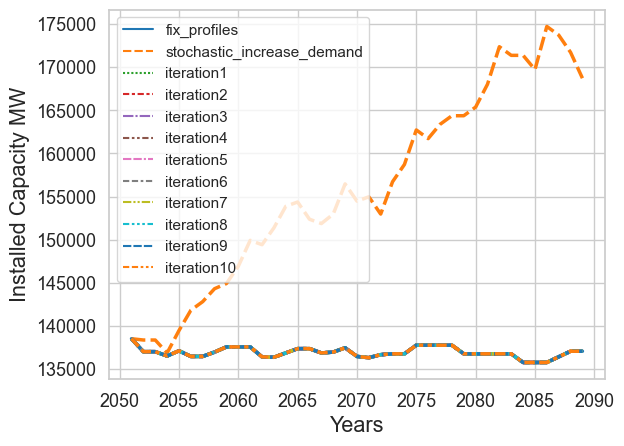

In [13]:
axs2 = sns.lineplot(data=InstalledCapacity_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Installed Capacity MW', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'InstalledCapacity.png', bbox_inches='tight', dpi=300)

In [14]:
melted = pd.melt(CostRecovery_data )

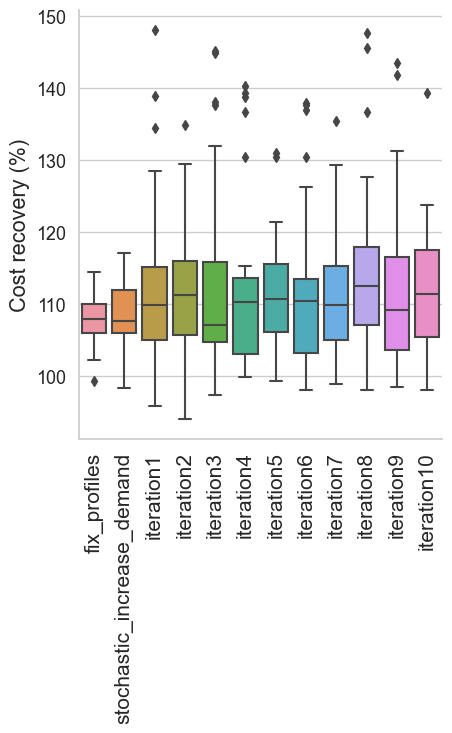

In [15]:
axs33 = sns.catplot(data=melted, x="variable", y="value",  kind="box")
#plt.xlabel('Weather profiles sequence', fontsize='large')
plt.xlabel('', fontsize='large')
plt.ylabel('Cost recovery (%)', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
#fig3 = axs33.get_figure()
axs33.savefig(path_to_plots + '/' + 'Cost_Recovery_boxes.png', bbox_inches='tight', dpi=300)

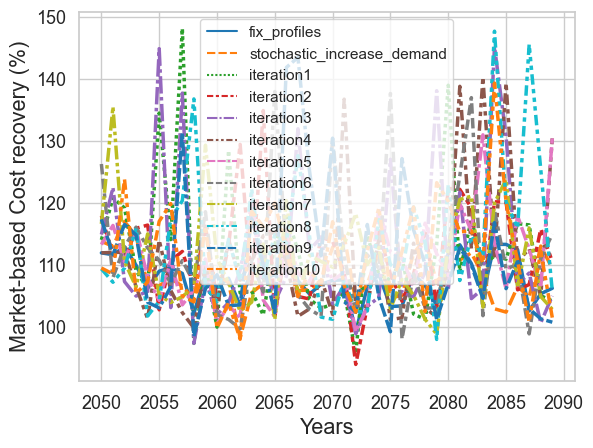

In [16]:
#CostRecovery_data.drop([2050], inplace=True)
axs3 = sns.lineplot(data=CostRecovery_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig3 = axs3.get_figure()
fig3.savefig(path_to_plots + '/' + 'Cost_Recovery.png', bbox_inches='tight', dpi=300)

In [17]:
# CostRecovery_data_substracted = CostRecovery_data.sub(CostRecovery_data['fix_profiles'], axis=0)
# axs3 = sns.lineplot(data=CostRecovery_data_substracted, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='large')
# plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
# plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
# #axs2.set_title('Market-based Cost recovery')
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_substracted.png', bbox_inches='tight', dpi=300)
# axs33 = sns.catplot(data=pd.melt(CostRecovery_data_substracted ), x="variable", y="value",  kind="box")
# plt.xlabel('Weather profiles sequence', fontsize='large')
# plt.ylabel('Cost recovery (%)', fontsize='large')
# plt.tight_layout()
# plt.xticks(rotation=90, size = 15)   
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_difference.png', bbox_inches='tight', dpi=300)

C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_17772\2939854450.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig6.savefig(path_to_plots + '/' + 'LOLEs.png', bbox_inches='tight', figsize=(4, 3), dpi=300)


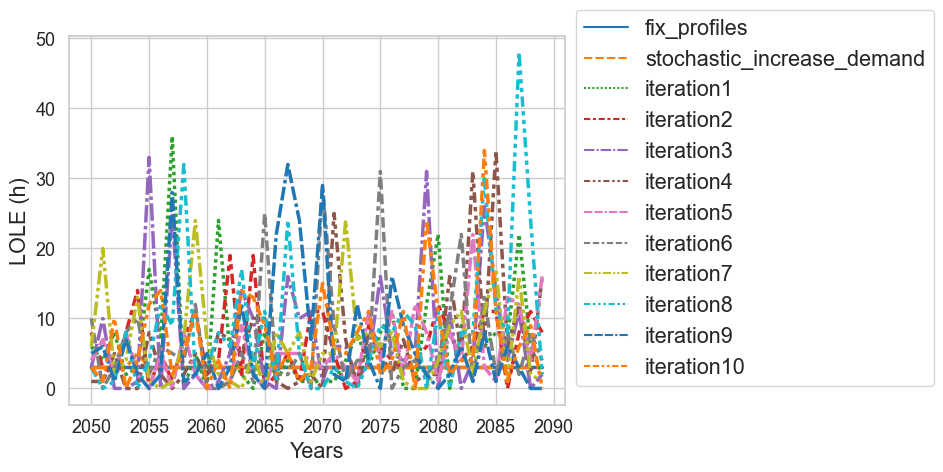

In [18]:
#LOL_data.drop([2050], inplace=True)
# fig, axes = plt.subplots(nrows=2, ncols=1)
# sns.set_style("whitegrid")
# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,  ax=axes[0], legend = None)
# plt.ylim([0, 25])
# plt.ylabel('Hours', fontsize='large')

# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,    ax=axes[1], legend = None)
# plt.ylim([0, 220])
# #axes[1].legend(LOL_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
# plt.ylabel('Hours', fontsize='large')
# axes[0].set_title('LOLE')
# fig.savefig(path_to_plots + '/' + 'LOLE.png', bbox_inches='tight', dpi=300)
axs6 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5, )
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('LOLE (h)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('LOLE')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'LOLEs.png', bbox_inches='tight', figsize=(4, 3), dpi=300)

In [19]:
#LOL_data_substracted = LOL_data.sub(LOL_data["fix_profiles"], axis=0)

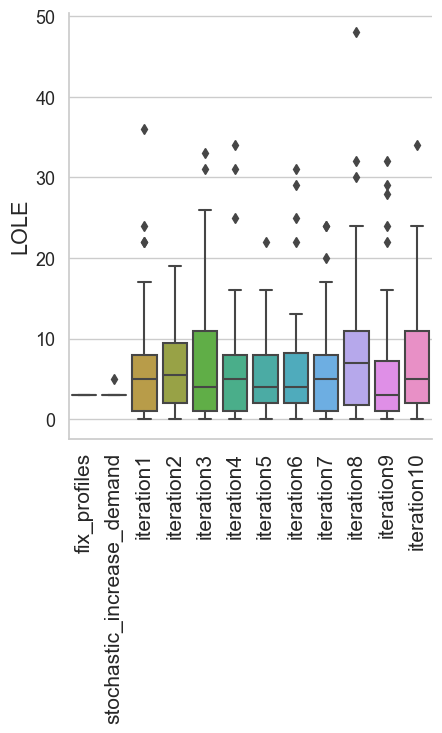

In [20]:
axs1 = sns.catplot( data=pd.melt(LOL_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('LOLE', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)  

axs1.savefig(path_to_plots + '/' + 'LOLE_boxes.png', bbox_inches='tight', dpi=300)

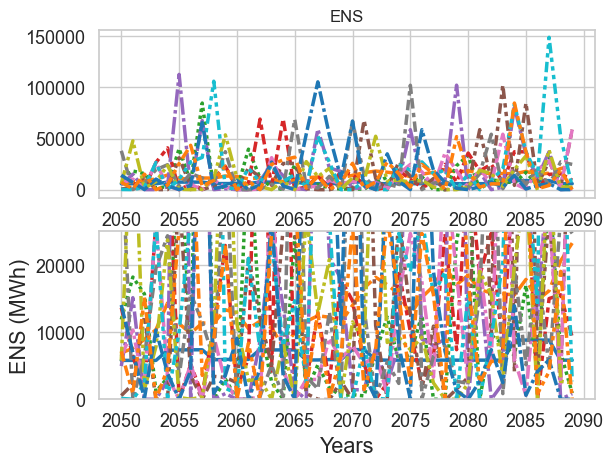

In [21]:
fig, axes= plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[0], legend = None)
plt.ylabel('MWh', fontsize='medium')
plt.ylim([0, 25000])
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[1], legend = None)
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')
#axes[1].legend(ENS_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
axes[0].set_title('ENS')
fig.savefig(path_to_plots + '/' + 'Energy not supplied.png', bbox_inches='tight', dpi=300)

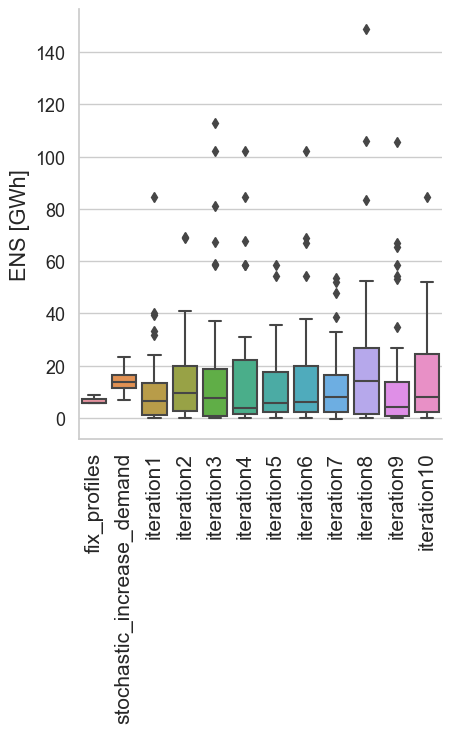

In [22]:
ENS_data_GWH = ENS_data/1000
axs1 = sns.catplot( data=pd.melt(ENS_data_GWH), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('ENS [GWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'ENS_boxes.png', bbox_inches='tight', dpi=300)

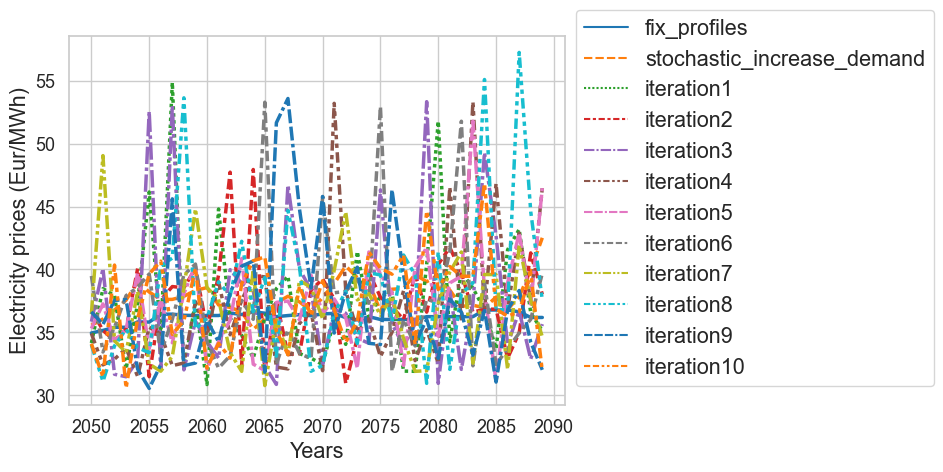

In [23]:
#CostRecovery_data.plot()
#ElectricityPrices_data.drop([2050], inplace=True)
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

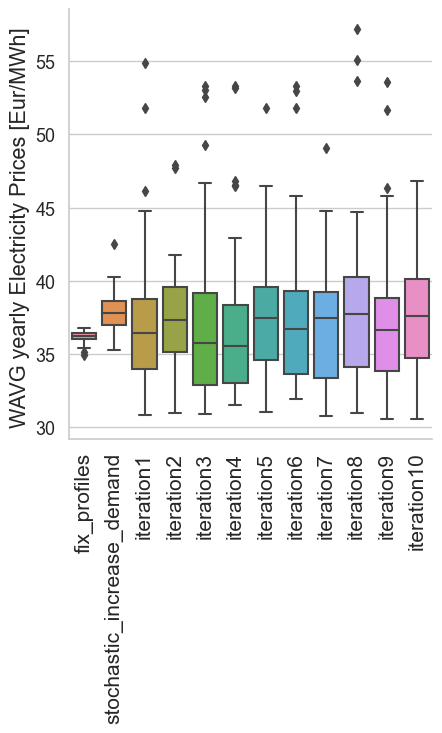

In [24]:
axs1 = sns.catplot( data=pd.melt(ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Electicity_prices_boxes.png', bbox_inches='tight', dpi=300)

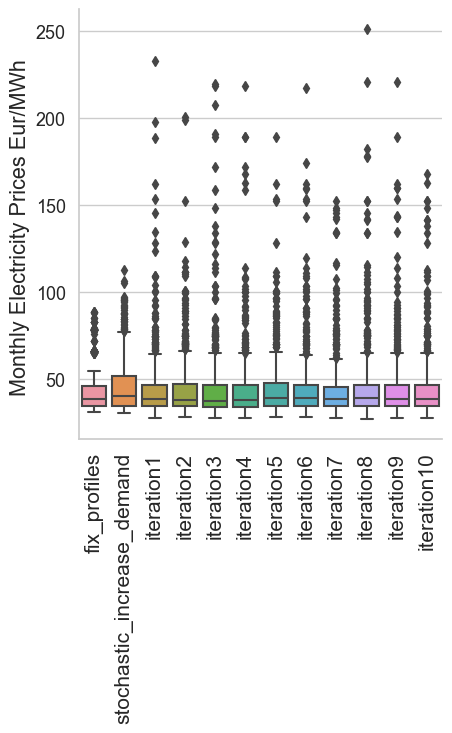

In [25]:
axs1 = sns.catplot( data=pd.melt(Monthly_ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Monthly Electricity Prices Eur/MWh ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'Monthly_Electicity_prices_boxes.png', bbox_inches='tight', dpi=300)

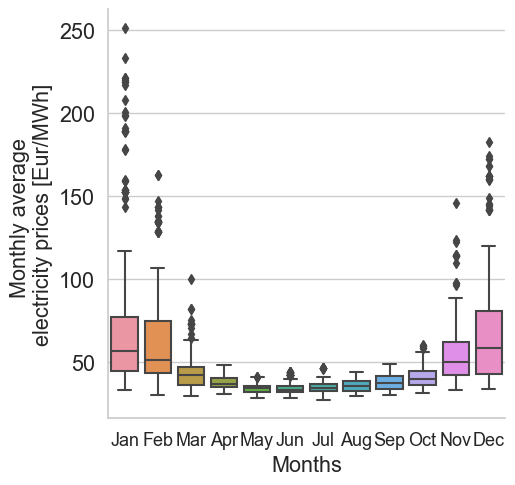

In [26]:
#months = list(range(1,13))*40
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']*40
mlted_monthly_prices = Monthly_ElectricityPrices_data[selected_scenarios].copy()
mlted_monthly_prices['group'] = months
monthly_melted_electricity_prices = mlted_monthly_prices.melt(id_vars='group', var_name='Variable', value_name='Value')
axs1 = sns.catplot( data=monthly_melted_electricity_prices, x="group", y="Value",  kind="box")
plt.xlabel('Months', fontsize='large')
plt.yticks(fontsize='large')
plt.xticks(fontsize='medium')
plt.ylabel('Monthly average \n electricity prices [Eur/MWh] ', fontsize='large')
axs1.savefig(path_to_plots + '/' + 'Monthly_Electricity_prices.png', bbox_inches='tight', dpi=1000)

In [27]:
a = mlted_monthly_prices[mlted_monthly_prices["group"] =="Jun"].mean().mean()
print(a)
mlted_monthly_prices[mlted_monthly_prices["group"] =="Jan"].mean().mean()

33.927209554226


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_17772\4037816788.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = mlted_monthly_prices[mlted_monthly_prices["group"] =="Jun"].mean().mean()
C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_17772\4037816788.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mlted_monthly_prices[mlted_monthly_prices["group"] =="Jan"].mean().mean()


71.2265947107305

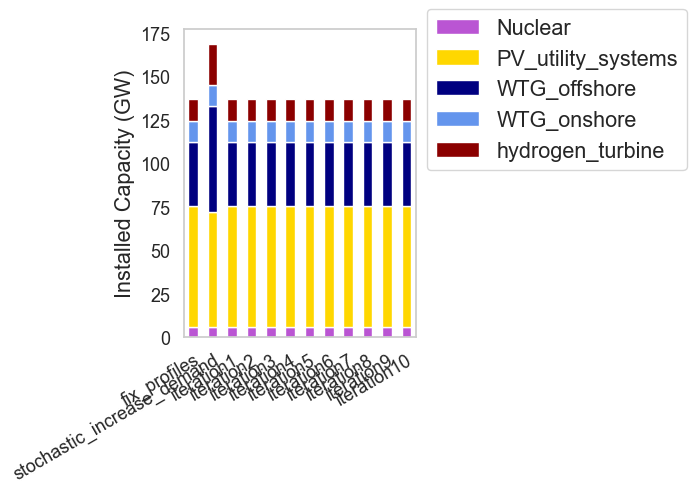

In [28]:
cpacities = Last_year_capacity_data.T
cpacities = cpacities/1000
cpacities_nozeroes = cpacities[cpacities>0]
cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)
colors = [technology_colors[tech] for tech in cpacities_nozeroes.columns.values]
axs9 = cpacities_nozeroes.plot(kind='bar', stacked=True, color=colors, figsize = (3,4))
plt.grid()
sns.set_style("whitegrid")
axs9.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Installed Capacity (GW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))
fig9 = axs9.get_figure()
fig9.savefig(path_to_plots + '/' + 'Last year capacity.png', bbox_inches='tight', dpi=300)


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_17772\4107581734.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")


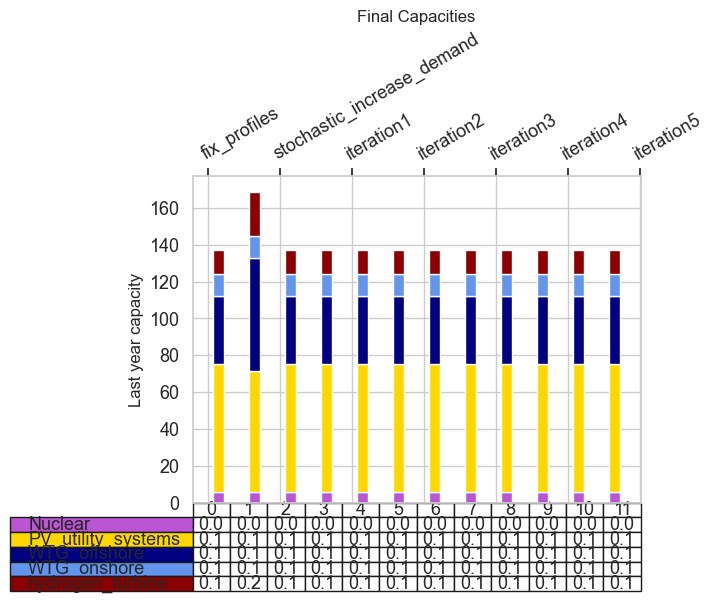

In [29]:
final_year_capacities = cpacities_nozeroes.T
data =final_year_capacities.values
columns = list(range(0, len(final_year_capacities.columns))) #final_year_capacities.columns
newcolumns = final_year_capacities.columns.insert(0, "new")
rows = final_year_capacities.index

n_rows = len(data)
bar_width = 0.3
index = np.arange(len(columns)) + bar_width

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
fig, axs = plt.subplots()
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc ='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Final Capacities')
plt.ylabel("Last year capacity")

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")
# plt.show()
# plt.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png')
fig10 = plt.gcf()
fig10.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png', bbox_inches='tight', dpi=300)

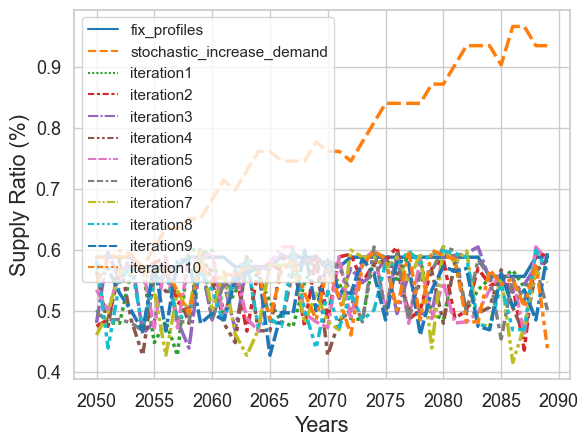

In [30]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


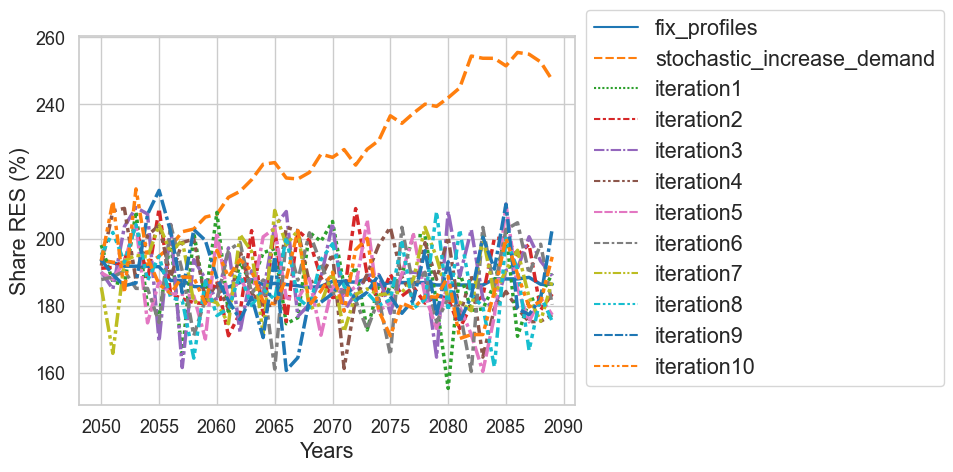

In [31]:
percentage_RES = ShareRES_data
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)


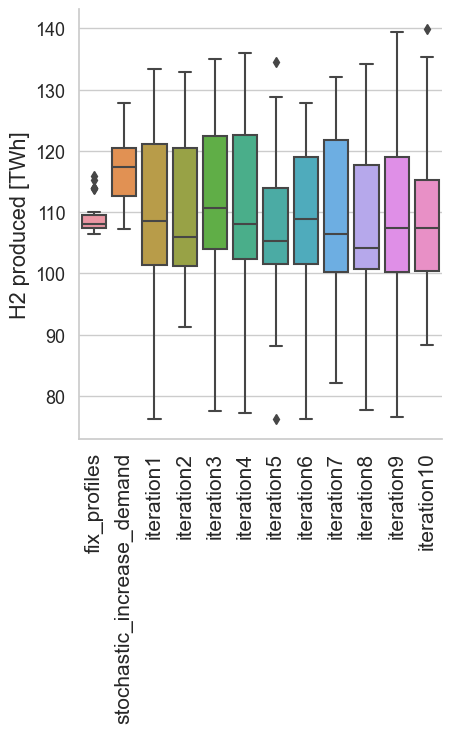

In [32]:
H2Production_data_twh = (H2Production_data/1000000)*0.74
axs1 = sns.catplot( data=pd.melt(H2Production_data_twh), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('H2 produced [TWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Electrolyzer_boxes.png', bbox_inches='tight', dpi=300)

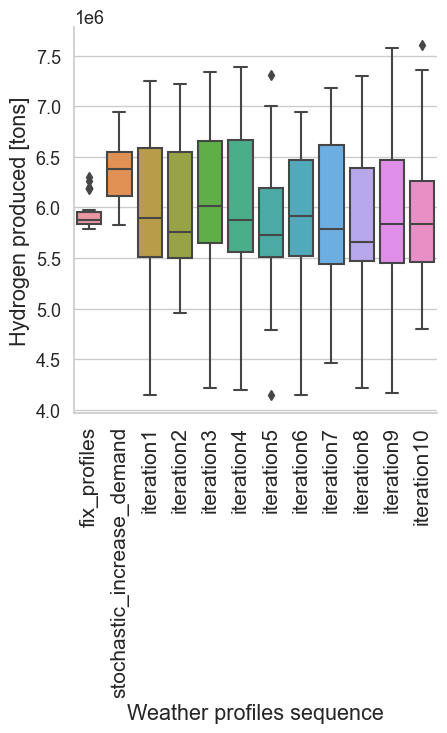

In [33]:
Energy_consumed_in_electrolysis = 1/ 0.74
#Hydrogen produced (kg) = Energy consumed in electrolysis (kWh) / LHV of hydrogen kWh/kg
kg_hydrogen_per_kwh= Energy_consumed_in_electrolysis/ 33.6 
ton_hydrogen_per_mwh = kg_hydrogen_per_kwh
H2Production_tons = H2Production_data*ton_hydrogen_per_mwh
axs1 = sns.catplot( data=pd.melt(H2Production_tons), x="variable", y="value",  kind="box")
plt.xlabel('Weather profiles sequence', fontsize='large')
plt.ylabel('Hydrogen produced [tons]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Hydrogen production_boxes.png', bbox_inches='tight', dpi=300)

In [34]:
# sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.2)
# sheet_name = "groupedDecarbonizedNL"
# df = pd.read_excel("C:\\toolbox-amiris-emlab\\data\\Power_plants.xlsx",
#                    sheet_name=sheet_name)

# colors = [technology_colors[tech] for tech in df["Technology"].unique()]

# fig1 = sns.relplot(x="Age", y="Efficiency", hue="Technology", size="Capacity",
#                    sizes=(40, 400), alpha=.5, palette=colors,
#                    height=6, data=df)
# plt.xlabel("Age", fontsize="large")
# plt.ylabel("Efficiency", fontsize="large")
# fig1.savefig(path_to_plots + '/' + 'Initial_power_plants' +sheet_name + '.png', bbox_inches='tight', dpi=300)


In [35]:
AverageProfits.head()

technology,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine,...,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine
scenario_name,fix_profiles,fix_profiles,fix_profiles,fix_profiles,fix_profiles,stochastic_increase_demand,stochastic_increase_demand,stochastic_increase_demand,stochastic_increase_demand,stochastic_increase_demand,...,iteration9,iteration9,iteration9,iteration9,iteration9,iteration10,iteration10,iteration10,iteration10,iteration10
0,-133551.322190,6989.833384,28836.623204,48332.972530,-5987.309869,-125039.130044,7300.767882,30338.950483,49976.663738,-265.559869,...,-108980.084409,7419.009066,31725.125699,51467.658740,18363.440131,-145939.984368,6864.215724,26796.140700,46364.394991,-14366.309869
1,-132380.585817,7932.452889,29412.966899,48868.804727,-5601.559869,-119997.481024,8451.542804,31685.363850,51313.047747,2141.690131,...,-130035.978310,11593.287876,24617.475403,36670.060524,-366.309869,-189937.756939,4233.945979,34917.158107,63109.601318,-21088.059869
2,-131103.496896,8958.457982,30150.916503,49505.425380,-5465.809869,-110347.090203,9028.357956,33620.590062,53333.088263,8706.190131,...,-101632.212529,11546.711542,33297.632268,41215.307627,913.190131,-63197.863221,11229.447862,32340.438160,47019.830855,48677.940131
3,-131103.496896,8958.457982,30150.916503,49505.425380,-5465.809869,-100286.068583,9600.690842,35800.420777,55647.829340,14356.690131,...,-99940.028376,10152.623208,31248.923394,44409.109406,21570.440131,-199935.039038,4369.900021,34952.387150,71334.044357,-30059.809869
4,-123495.996896,9315.875348,30784.593818,50434.369370,2141.690131,-78995.009057,10636.847908,38939.506011,59343.883787,32007.190131,...,-186992.532877,5870.953659,39148.821582,68782.779420,-18495.309869,-118040.004935,9227.355036,30484.877043,50991.648817,10755.940131


In [36]:
AverageProfits.head()

technology,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine,...,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine,Nuclear,PV_utility_systems,WTG_offshore,WTG_onshore,hydrogen_turbine
scenario_name,fix_profiles,fix_profiles,fix_profiles,fix_profiles,fix_profiles,stochastic_increase_demand,stochastic_increase_demand,stochastic_increase_demand,stochastic_increase_demand,stochastic_increase_demand,...,iteration9,iteration9,iteration9,iteration9,iteration9,iteration10,iteration10,iteration10,iteration10,iteration10
0,-133551.322190,6989.833384,28836.623204,48332.972530,-5987.309869,-125039.130044,7300.767882,30338.950483,49976.663738,-265.559869,...,-108980.084409,7419.009066,31725.125699,51467.658740,18363.440131,-145939.984368,6864.215724,26796.140700,46364.394991,-14366.309869
1,-132380.585817,7932.452889,29412.966899,48868.804727,-5601.559869,-119997.481024,8451.542804,31685.363850,51313.047747,2141.690131,...,-130035.978310,11593.287876,24617.475403,36670.060524,-366.309869,-189937.756939,4233.945979,34917.158107,63109.601318,-21088.059869
2,-131103.496896,8958.457982,30150.916503,49505.425380,-5465.809869,-110347.090203,9028.357956,33620.590062,53333.088263,8706.190131,...,-101632.212529,11546.711542,33297.632268,41215.307627,913.190131,-63197.863221,11229.447862,32340.438160,47019.830855,48677.940131
3,-131103.496896,8958.457982,30150.916503,49505.425380,-5465.809869,-100286.068583,9600.690842,35800.420777,55647.829340,14356.690131,...,-99940.028376,10152.623208,31248.923394,44409.109406,21570.440131,-199935.039038,4369.900021,34952.387150,71334.044357,-30059.809869
4,-123495.996896,9315.875348,30784.593818,50434.369370,2141.690131,-78995.009057,10636.847908,38939.506011,59343.883787,32007.190131,...,-186992.532877,5870.953659,39148.821582,68782.779420,-18495.309869,-118040.004935,9227.355036,30484.877043,50991.648817,10755.940131


In [37]:
slice("technology")

slice(None, 'technology', None)

In [38]:
AverageProfits_filtered = AverageProfits.loc[:, ((slice("technology"), selected_scenarios)) ]

UnsortedIndexError: 'MultiIndex slicing requires the index to be lexsorted: slicing on levels [0], lexsort depth 0'

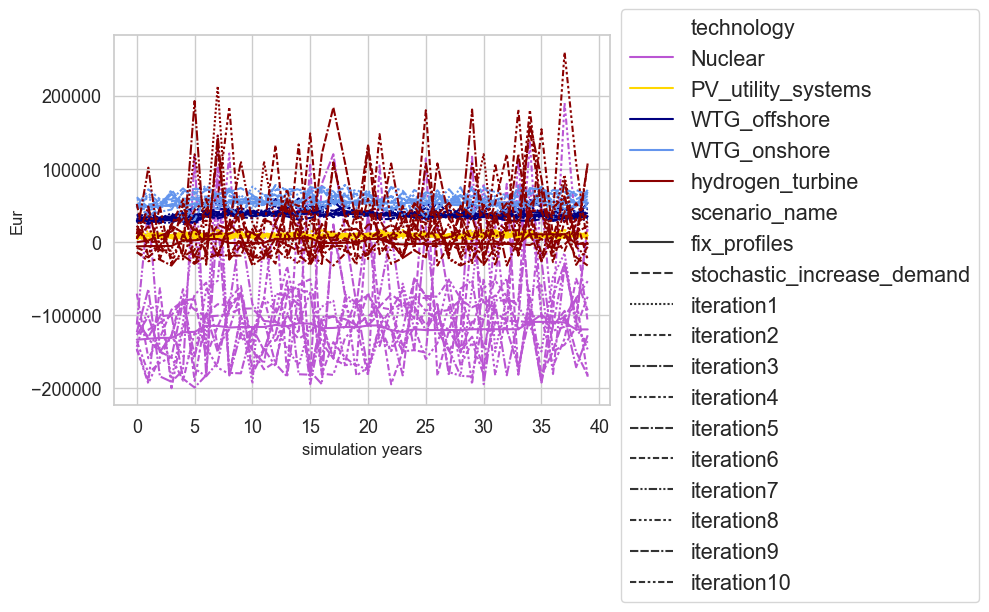

In [39]:
#AverageProfits_filtered = AverageProfits.loc[:, ((slice("technology"), selected_scenarios)) ]
AverageProfits_filtered = AverageProfits
colors = [technology_colors[key] for key in AverageProfits_filtered.columns.get_level_values(0).unique()]
AverageProfits_all = pd.melt(AverageProfits_filtered.reset_index(), id_vars='index')
AverageProfits_all.head()
sns.lineplot(x="index", y="value",  hue = "technology", style="scenario_name",
             data=AverageProfits_all, 
             palette=colors
           ).set(xlabel='simulation years', ylabel='Eur')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
plt.savefig(path_to_plots + '/' + 'operational_profits.png', bbox_inches='tight', dpi=300)

In [40]:
AverageNPVpertechnology_all = pd.melt(AverageNPVpertechnology.reset_index(), id_vars='index')
AverageNPVpertechnology_all.head()

,index,technology,scenario_name,value
0,2050,Nuclear,fix_profiles,-2.965604e+06
1,2051,Nuclear,fix_profiles,-2.953452e+06
2,2052,Nuclear,fix_profiles,-2.940196e+06
3,2053,Nuclear,fix_profiles,-2.940196e+06
4,2054,Nuclear,fix_profiles,-2.861234e+06


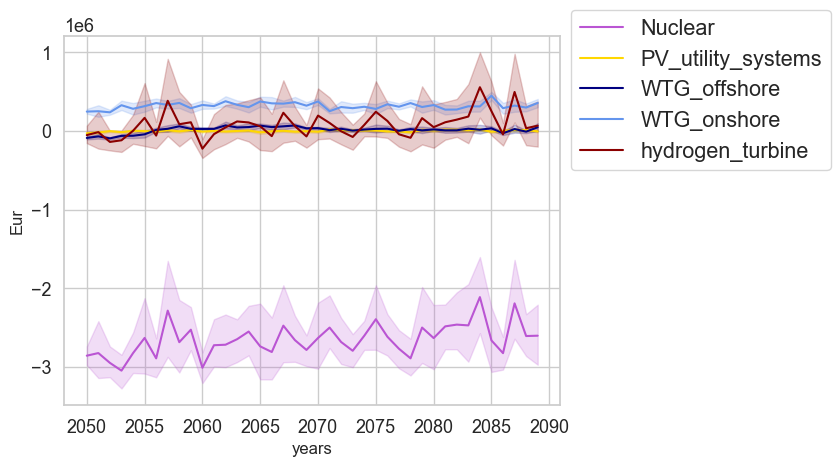

In [41]:
sns.lineplot(x="index", y="value",  hue = "technology", #style="scenario_name",
            data=AverageNPVpertechnology_all,    palette=colors).set(xlabel='years', ylabel='Eur')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
plt.savefig(path_to_plots + '/' + 'NPVs_0_dscount_rate.png', bbox_inches='tight', dpi=300)

In [42]:
FLH_data = pd.read_excel(path_to_results, sheet_name='FLH', index_col=0)
Years_data = pd.read_excel(path_to_results, sheet_name='YEARS', index_col=0)

In [43]:
min_val = InstalledCapacity_data.min()
max_val = InstalledCapacity_data.max()
normalized_capacity = (InstalledCapacity_data - min_val) / (max_val - min_val)
normalized_capacity.head()

,fix_profiles,stochastic_increase_demand,iteration1,iteration2,iteration3,iteration4,iteration5,iteration6,iteration7,iteration8,iteration9,iteration10
2051,1.000000,0.043593,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2052,0.454545,0.039630,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545
2053,0.454545,0.039630,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545
2054,0.272727,0.000000,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727
2055,0.490909,0.068692,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909


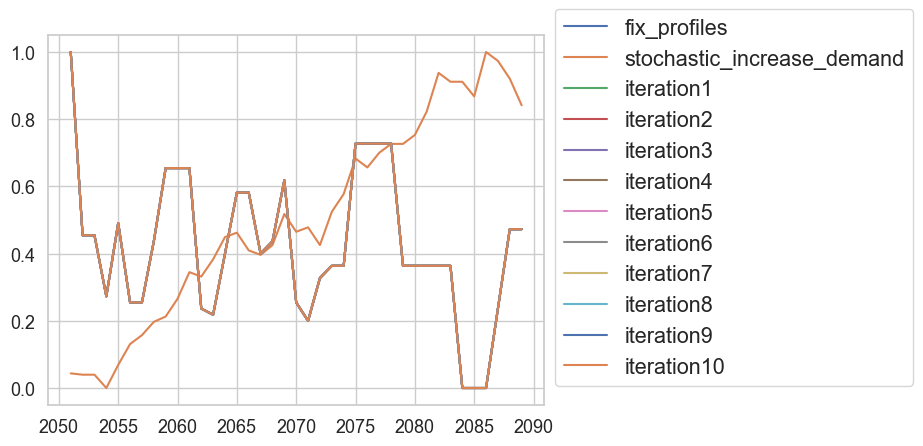

In [44]:
normalized_capacity.plot()
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))

In [45]:
full_load_hours = pd.DataFrame()
full_load_hours= Years_data.applymap(FLH_data['average'].get)
full_load_hours["year"] = full_load_hours.index.values + 2050
full_load_hours.set_index('year', inplace = True)
full_load_hours.drop(2050, inplace = True)
min_val = full_load_hours.min()
max_val = full_load_hours.max()
normalized_FLH = (full_load_hours - min_val) / (max_val - min_val)

In [46]:
normalized_ElectricityPrices = ElectricityPrices_data.copy()
normalized_ElectricityPrices.drop(2050, inplace = True)
min_val = normalized_ElectricityPrices.min()
max_val = normalized_ElectricityPrices.max()
normalized_ElectricityPrices = (normalized_ElectricityPrices - min_val) / (max_val - min_val)

In [47]:
#ElectricityPrices_data.drop(2050, inplace = True)
normalized_capacity

,fix_profiles,stochastic_increase_demand,iteration1,iteration2,iteration3,iteration4,iteration5,iteration6,iteration7,iteration8,iteration9,iteration10
2051,1.000000,0.043593,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2052,0.454545,0.039630,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545
2053,0.454545,0.039630,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545
2054,0.272727,0.000000,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727
2055,0.490909,0.068692,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909,0.490909
2056,0.254545,0.130779,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545
2057,0.254545,0.157199,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545,0.254545
2058,0.436364,0.196830,0.436364,0.436364,0.436364,0.436364,0.436364,0.436364,0.436364,0.436364,0.436364,0.436364
2059,0.654545,0.212682,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545
2060,0.654545,0.265522,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545,0.654545


iteration1


ValueError: 'c' argument has 43 elements, which is inconsistent with 'x' and 'y' with size 39.

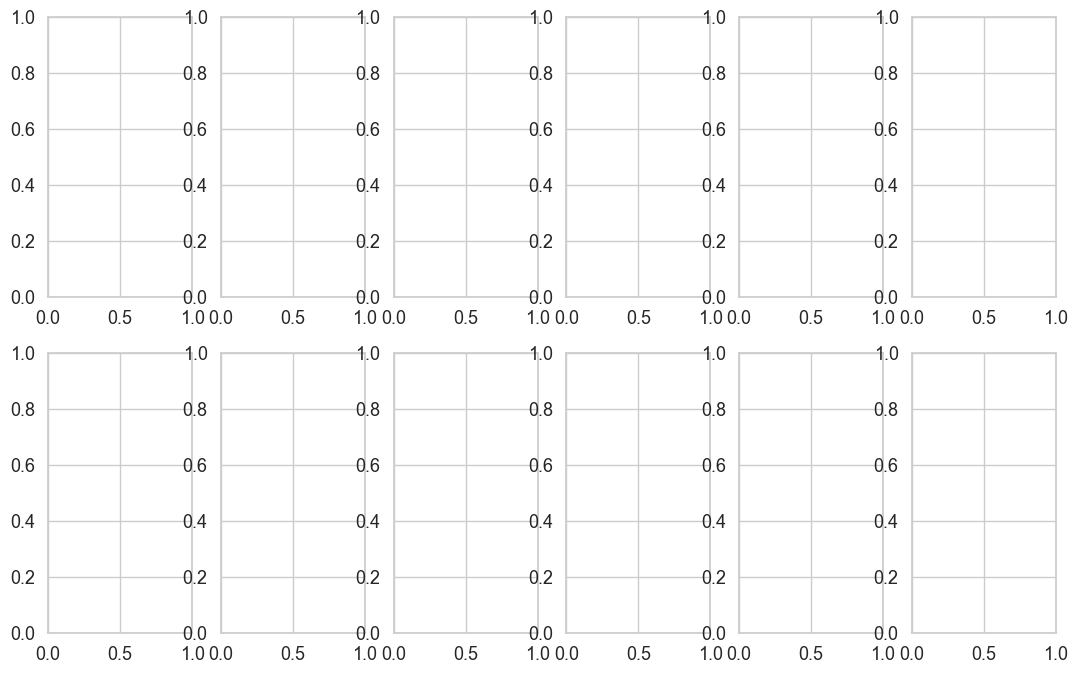

In [48]:
bwr_reversed = plt.cm.get_cmap('bwr')
num_columns = len(normalized_FLH.columns)
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(13, 8))

for i, col1 in enumerate(normalized_FLH.columns):
    print(col1)
    if i == 0:
        ax = axes[0,0]    
    elif  i % 2 == 0:
        ax =axes[0,round(i/2)]        
    else:
        ax = axes[1,math.floor(i/2)]    
    ax.scatter(normalized_FLH[col1], normalized_capacity[col1], c=normalized_ElectricityPrices[col1], cmap='viridis') 
    ax.set_title(col1)
    ax.set_xlabel('normalized_FLH')
    ax.set_ylabel("normalized_capacity")
# plt.xlabel('normalized_FLH')
# plt.ylabel("normalized_capacity")

plt.tight_layout()
plt.show()

In [ ]:
for i, col1 in enumerate(normalized_FLH.columns):
    if i ==0: 
        pass
    else:
        filteredrows =  (normalized_FLH[col1] >= 0.8) & (normalized_FLH[col1] <= 1)
        plt.scatter(normalized_FLH[col1][filteredrows],
                    normalized_capacity[col1][filteredrows],
                    c=normalized_ElectricityPrices[col1][filteredrows], cmap=bwr_reversed,  alpha=0.5) 
plt.xlabel('normalized Full Load hours')
plt.ylabel("normalized Installed Capacity")

plt.legend()
plt.savefig(path_to_plots + '/' + 'yearly_capacity_FLH.png', bbox_inches='tight', dpi=300)

In [ ]:
for i, col1 in enumerate(normalized_FLH.columns):
    if i ==0: 
        pass
    else:
        plt.scatter(full_load_hours[col1], InstalledCapacity_data[col1]/1000, 
                    c=ElectricityPrices_data[col1], cmap=bwr_reversed,  alpha=0.5) 
plt.xlabel(' average full Load hours (wind + solar)')
plt.ylabel("Installed Capacity GW")        
plt.colorbar( orientation='vertical',
             label="Yearly Electricity prices Eur/MWh")

plt.savefig(path_to_plots + '/' + 'yearly_capacity_vs_FLH.png', bbox_inches='tight', dpi=300)        

In [50]:
H2Production_data_twh_clean = H2Production_data_twh.drop(2050)

ValueError: 'c' argument has 43 elements, which is inconsistent with 'x' and 'y' with size 39.

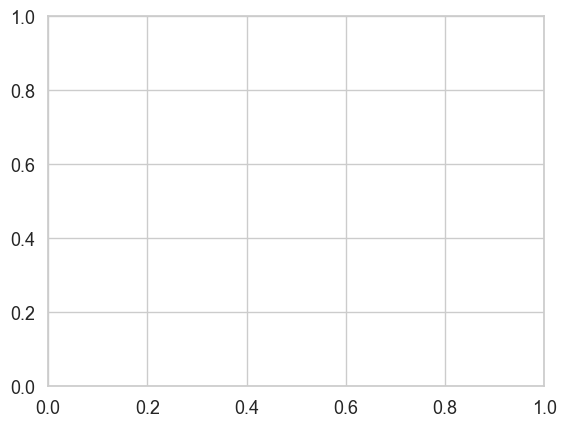

In [51]:
for i, col1 in enumerate(normalized_FLH.columns):
    if i ==0: 
        pass
    else:
        plt.scatter(normalized_FLH[col1], normalized_capacity[col1], 
                    c=H2Production_data_twh_clean[col1], cmap=bwr_reversed,  alpha=0.5) 
plt.colorbar( orientation='vertical',
             label="hydrogen production")        
plt.xlabel('normalized Full Load hours')
plt.ylabel("normalized Installed Capacity")   

In [52]:
Years_data["year"] = Years_data.index.values + 2050
Years_data.set_index('year', inplace = True)
Years_data.drop(2050, inplace = True)

In [53]:
high_electricity_years = Years_data[ElectricityPrices_data>50]
high_electricity_years_all = pd.melt(high_electricity_years )
high_electricity_years_all.drop("variable", axis = 1, inplace = True)

ValueError: putmask: mask and data must be the same size

In [ ]:
high_electricity_years_all.value_counts()

In [ ]:
count_per_row = high_electricity_years.apply(lambda row: row.value_counts(), axis=1)
print(count_per_row)

In [ ]:
ElectricityPrices_data

In [ ]:
melted_electricity_prices = ElectricityPrices_data[selected_scenarios].copy()
melted_electricity_prices.reset_index(inplace = True)
melted_electricity_prices =melted_electricity_prices.melt(id_vars='year', var_name='Variable', value_name='Value')

In [ ]:
melted_LOLE = LOL_data[selected_scenarios].copy()
melted_LOLE.reset_index(inplace=True)
melted_LOLE = melted_LOLE.melt(id_vars='year', var_name='Variable', value_name='Value')

melted_cost_recovery = CostRecovery_data[selected_scenarios].copy()
melted_cost_recovery.reset_index(inplace=True)
melted_cost_recovery = melted_cost_recovery.melt(id_vars='year', var_name='Variable', value_name='Value') 

ENS= ENS_data.copy()
ENS_GWh = ENS/1000
melted_ENS = ENS_GWh[selected_scenarios].copy()
melted_ENS.reset_index(inplace=True)
melted_ENS = melted_ENS.melt(id_vars='year', var_name='Variable', value_name='Value')

melted_H2Production_data_twh = H2Production_data_twh[selected_scenarios].copy()
melted_H2Production_data_twh.reset_index(inplace = True)
melted_H2Production_data_twh.head()
melted_H2Production_data_twh =melted_H2Production_data_twh.melt(id_vars='year', var_name='Variable', value_name='Value')

In [ ]:
fig, axes= plt.subplots(nrows=5, ncols=1)

axes[0].set_ylabel('LOLE \n [hours]', fontsize='medium')
LOL_data["fix_profiles"].plot( ax=axes[0], color = "black")
LOL_data["stochastic_increase_demand"].plot( ax=axes[0], color = "red", linestyle='dashed')
sns.lineplot(x="year", y="Value",ax=axes[0],  data=melted_LOLE[melted_LOLE["Variable"].isin(selected_scenarios)],
            errorbar=('ci', 100))
axes[0].legend(["fix profiles","increase-demand", "mean stochastic-profiles", "stochastic profiles"], fontsize='medium',  bbox_to_anchor=(1 , 1))

axes[0].set_xticklabels([])
axes[1].set_ylabel('EENS \n [GWh]', fontsize='medium')
ENS_GWh["fix_profiles"].plot( ax=axes[1], color = "black")
ENS_GWh["stochastic_increase_demand"].plot( ax=axes[1], color = "red", linestyle='dashed')
sns.lineplot(x="year", y="Value",ax=axes[1],  data=melted_ENS[melted_ENS["Variable"].isin(selected_scenarios)],
            errorbar=('ci', 100))
axes[1].legend().remove()
axes[1].set_xticklabels([])

sns.lineplot(x="years", y="Value", ax=axes[2], data=melted_electricity_prices[melted_electricity_prices["Variable"].isin(selected_scenarios)],
            errorbar=('ci', 100))
ElectricityPrices_data["fix_profiles"].plot( ax=axes[2], color = "black")
ElectricityPrices_data["stochastic_increase_demand"].plot( ax=axes[2], color = "red", linestyle='dashed')
axes[2].set_ylabel('WAvg \n electricity \n prices \n [Eur/MWh]', fontsize='medium')
axes[2].set_xticklabels([])


sns.lineplot(x="year", y="Value", ax=axes[3], data=melted_H2Production_data_twh, errorbar=('ci', 100))
H2Production_data_twh["fix_profiles"].plot( ax=axes[3], color = "black")
H2Production_data_twh["stochastic_increase_demand"].plot( ax=axes[3], color = "red", linestyle='dashed')
axes[3].set_ylabel('H2 \n production \n[TWh]', fontsize='medium')
axes[3].set_xticklabels([])

sns.lineplot(x="year", y="Value", ax=axes[4], 
             data=melted_cost_recovery[melted_cost_recovery["Variable"].isin(selected_scenarios)],
            errorbar=('ci', 100))
CostRecovery_data["fix_profiles"].plot( ax=axes[4], color = "black")
CostRecovery_data["stochastic_increase_demand"].plot( ax=axes[4], color = "red", linestyle='dashed')
axes[4].set_ylabel('Cost \nrecovery\n %', fontsize='medium')

plt.savefig(path_to_plots + '/' + 'LOLE_prices_recovery.png', bbox_inches='tight', dpi=300)     

In [ ]:
# monthly_prices=  Monthly_ElectricityPrices_data[selected_scenarios].copy()
# monthly_prices.reset_index(inplace = True)
# monthly_prices.head()
# monthly_prices =monthly_prices.melt(id_vars='years', var_name='Variable', value_name='Value')

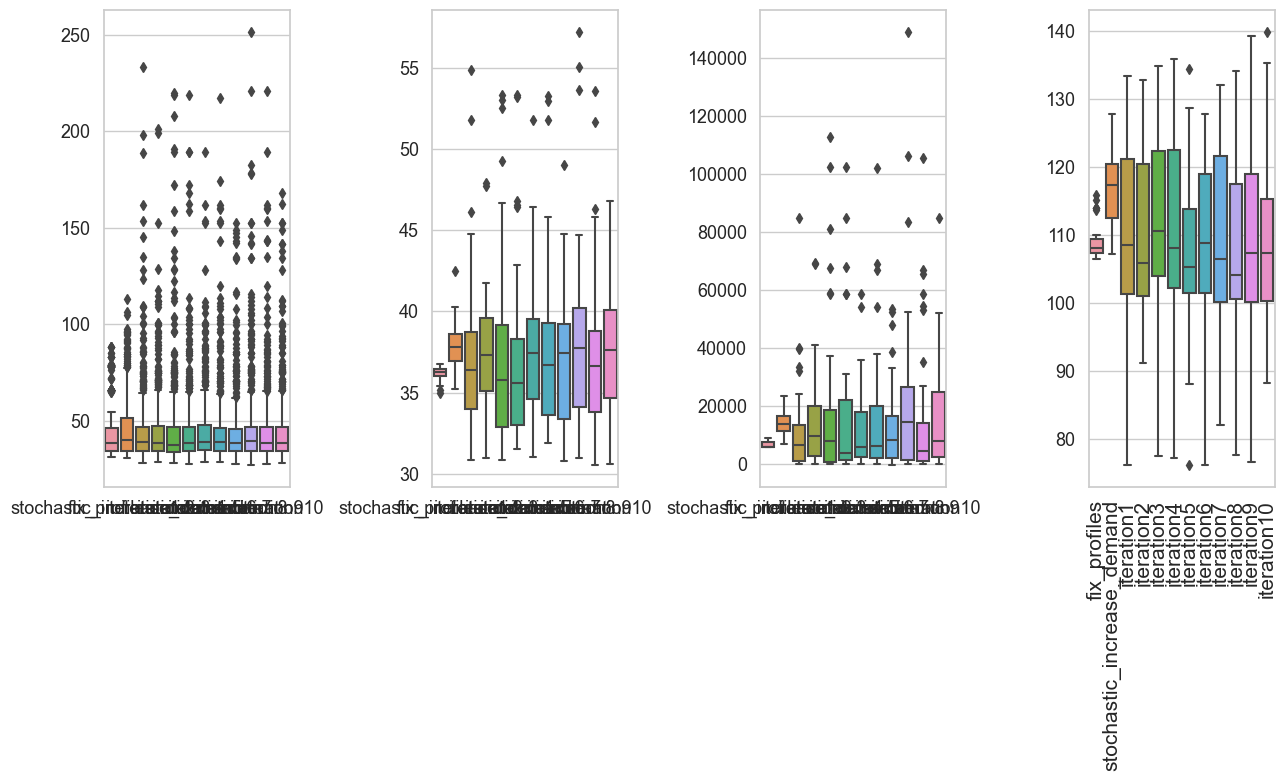

In [54]:
fig, axes= plt.subplots(nrows=1, ncols=4, figsize=(13, 8))
sns.boxplot( ax=axes[0], data=pd.melt(Monthly_ElectricityPrices_data),  x="variable", y="value")
#axes[0].set_title('Monthly Electricity Prices Eur/MWh')
#axes[0].set_xticks(rotation=90, size = 15)
plt.xticks(rotation=90, size = 15)   
sns.boxplot( data=pd.melt(ElectricityPrices_data), ax=axes[1], x="variable", y="value")
#axes[1].set_title('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(ENS_data), ax=axes[2],  x="variable", y="value")
#axes[2].set_title('ENS [GWh]', fontsize='large')
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(H2Production_data_twh),  ax=axes[3], x="variable", y="value")
#axes[3].set_title('Hydrogen produced [tons]', fontsize='large')


axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')

plt.xticks(rotation=90)   
plt.tight_layout()
axs1.savefig(path_to_plots + '/' + 'All.png', bbox_inches='tight', dpi=300)


In [ ]:
iterations_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"].isin(selected_scenarios)]
iterations_NPV_ = iterations_NPV.groupby(["years"])["value"].describe()


In [ ]:
fix_profiles_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="fix_profiles"]
fix_profiles_NPV_ = fix_profiles_NPV.groupby(["years"])["value"].describe()
fix_profiles_NPV_

In [ ]:
stochasticNPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="stochastic_increase_demand"]
stochasticNPV_ = stochasticNPV.groupby(["years"])["value"].describe()


In [ ]:
iterations_profits =  AverageProfits_all[AverageProfits_all["scenario_name"].isin(selected_scenarios)]
iterations_profits_ = iterations_profits.groupby(["years"])["value"].describe()

In [ ]:
fix_profiles_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="fix_profiles"]
fix_profiles_profits_ = fix_profiles_profits.groupby(["years"])["value"].describe()
fix_profiles_profits_

In [ ]:
stochastic_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="stochastic_increase_demand"]
stochastic_profits_ = stochastic_profits.groupby(["years"])["value"].describe()


In [ ]:
ser1 = pd.concat([fix_profiles_NPV_[["mean", "std"]], stochasticNPV_[["mean", "std"]], iterations_NPV_[["mean", "std"]]], axis = 1)
ser1

In [ ]:
ser2 = pd.concat([fix_profiles_profits_[["mean", "std"]], stochastic_profits_[["mean", "std"]], iterations_profits_[["mean", "std"]]], axis = 1)
ser2

In [ ]:
file = excelnpv =  os.path.join(path_to_plots,  "NPVs.xlsx")
with pd.ExcelWriter(file) as writer:
    ser1.to_excel(writer, sheet_name="npv", index=False)
    ser2.to_excel(writer, sheet_name="profits", index=False)

In [ ]:
column_name_mapping = {
    'iteration1': 'stochastic_profiles',
    'iteration2': 'stochastic_profiles',
    'iteration3': 'stochastic_profiles',
    'iteration4': 'stochastic_profiles',
    'iteration5': 'stochastic_profiles',
    'iteration6': 'stochastic_profiles',
    'iteration7': 'stochastic_profiles',
    'iteration8': 'stochastic_profiles',
    'iteration9': 'stochastic_profiles',
    'iteration10': 'stochastic_profiles',
}
NPVNewPlants_data.rename(columns=column_name_mapping, inplace=True)

In [ ]:

# Use the rename method to change column names
NPVNewPlants_data = NPVNewPlants_data.loc[["PV_utility_systems", "WTG_offshore","WTG_onshore", "hydrogen_turbine"]]

meltedNPV =  pd.melt(NPVNewPlants_data.reset_index(), id_vars='index')
sns.boxplot(x="index", y="value",  hue="variable",
            data=meltedNPV)
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))


In [ ]:
IRRNewPlants_raw = IRRNewPlants_data.loc[["PV_utility_systems", "WTG_offshore","WTG_onshore", "hydrogen_turbine"]]
IRRNewPlants = IRRNewPlants_raw*100
#IRRNewPlants.rename(columns=column_name_mapping, inplace=True)
meltedIRR =  pd.melt(IRRNewPlants.reset_index(), id_vars='index')
axs1 = sns.boxplot(x="index", y="value",  hue="variable",
            data=meltedIRR).set(xlabel='', ylabel='IRR  %')
plt.legend( title="", loc='upper left')
plt.savefig(path_to_plots + '/' + 'IRRs.png', bbox_inches='tight', dpi=300)